In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

from google.colab import drive

In [3]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
cwd = os.getcwd()
print(cwd)

/content


In [5]:
path = cwd + '/drive/MyDrive/Birds_Identification/data/train/'
print(path)

/content/drive/MyDrive/Birds_Identification/data/train/


In [6]:
# birds categories
categories = ['AFRICAN CROWNED CRANE','AFRICAN FIREFINCH','ALBATROSS','ALEXANDRINE PARAKEET','AMERICAN AVOCET','AMERICAN BITTERN','AMERICAN COOT','AMERICAN GOLDFINCH','AMERICAN KESTREL','AMERICAN PIPIT']

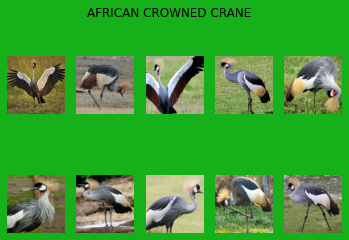

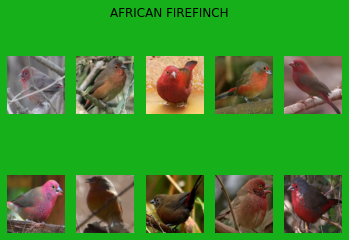

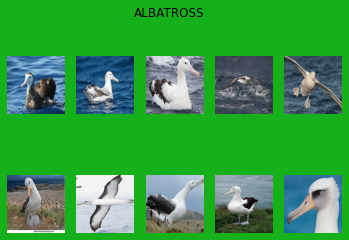

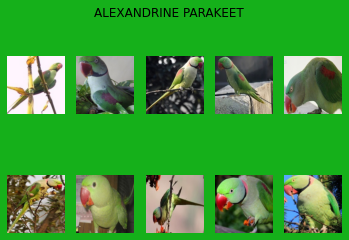

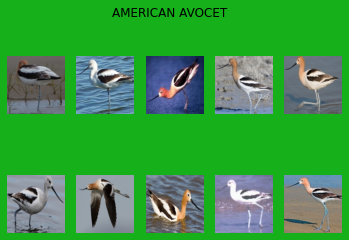

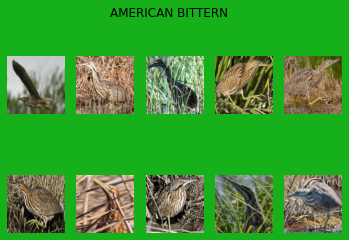

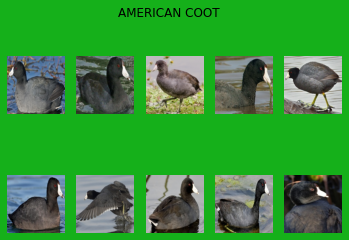

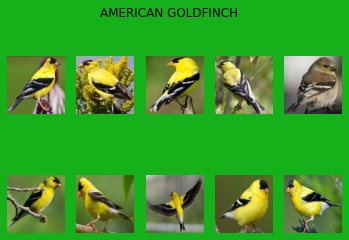

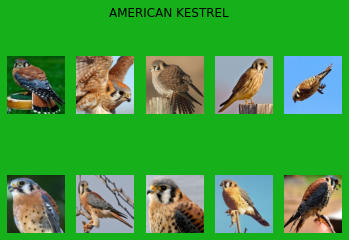

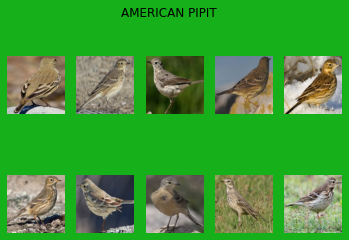

In [7]:
# let's display some of the pictures

for category in categories:
    fig, _ = plt.subplots(2,5)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:green')
    for k, v in enumerate(os.listdir(path+category)[10:20]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(2, 5, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [8]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

AFRICAN CROWNED CRANE  => height min :  224 width min :  224
AFRICAN CROWNED CRANE  => height max :  224 width max :  224
AFRICAN FIREFINCH  => height min :  224 width min :  224
AFRICAN FIREFINCH  => height max :  224 width max :  224
ALBATROSS  => height min :  224 width min :  224
ALBATROSS  => height max :  224 width max :  224
ALEXANDRINE PARAKEET  => height min :  224 width min :  224
ALEXANDRINE PARAKEET  => height max :  224 width max :  224
AMERICAN AVOCET  => height min :  224 width min :  224
AMERICAN AVOCET  => height max :  224 width max :  224
AMERICAN BITTERN  => height min :  224 width min :  224
AMERICAN BITTERN  => height max :  224 width max :  224
AMERICAN COOT  => height min :  224 width min :  224
AMERICAN COOT  => height max :  224 width max :  224
AMERICAN GOLDFINCH  => height min :  224 width min :  224
AMERICAN GOLDFINCH  => height max :  224 width max :  224
AMERICAN KESTREL  => height min :  224 width min :  224
AMERICAN KESTREL  => height max :  224 width m

In [9]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 224
WIDTH = 224
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'item1', k=1 : 'item2', k=2 : 'item3',k=3 :'item4'

import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

[['/content/drive/MyDrive/Birds_Identification/data/train/AMERICAN AVOCET/014.jpg', 4], ['/content/drive/MyDrive/Birds_Identification/data/train/AFRICAN FIREFINCH/128.jpg', 1], ['/content/drive/MyDrive/Birds_Identification/data/train/AMERICAN GOLDFINCH/067.jpg', 7], ['/content/drive/MyDrive/Birds_Identification/data/train/AMERICAN BITTERN/116.jpg', 5], ['/content/drive/MyDrive/Birds_Identification/data/train/AMERICAN AVOCET/107.jpg', 4], ['/content/drive/MyDrive/Birds_Identification/data/train/AMERICAN BITTERN/036.jpg', 5], ['/content/drive/MyDrive/Birds_Identification/data/train/AMERICAN KESTREL/064.jpg', 8], ['/content/drive/MyDrive/Birds_Identification/data/train/AMERICAN GOLDFINCH/047.jpg', 7], ['/content/drive/MyDrive/Birds_Identification/data/train/AMERICAN COOT/075.jpg', 6], ['/content/drive/MyDrive/Birds_Identification/data/train/AMERICAN PIPIT/175.jpg', 9]]


In [10]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0

# data = np.array(data, dtype="float") 
# mean_image = np.mean(data, axis=0)
# data -= mean_image

labels = np.array(labels)

In [11]:
print(data.shape, labels.shape)

(1524, 224, 224, 3) (1524,)


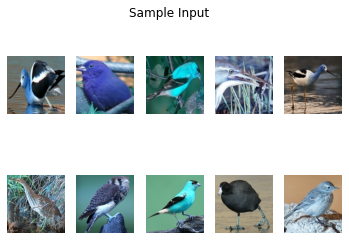

In [12]:
# Let's check everything is ok
fig, _ = plt.subplots(2,5)
fig.suptitle("Sample Input")
fig.patch.set_facecolor('xkcd:white')
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    # plt.title(categories[labels[i]])
plt.show()

In [21]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [22]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1219, 224, 224, 3)
(305, 224, 224, 3)
(1219,)
(305,)


In [23]:
trainX= np.reshape(trainX, (trainX.shape[0], -1))
testX = np.reshape(testX, (testX.shape[0], -1))

In [24]:
# Preprocess class labels


print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1219, 150528)
(305, 150528)
(1219,)
(305,)


In [25]:
from sklearn import svm
# clf = svm.SVC()
clf = svm.NuSVC()
clf.fit(trainX, trainY)

NuSVC()

In [26]:
# Preprocess class labels



print(testX.shape)
print(testY.shape)

(305, 150528)
(305,)


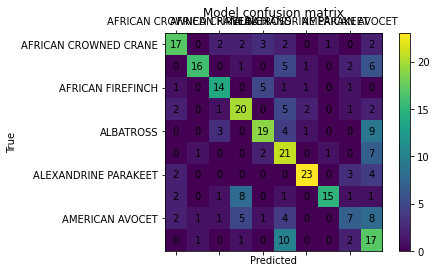

Accuracy : 55.41%


In [27]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = clf.predict(testX)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(10):
    for j in range(10):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

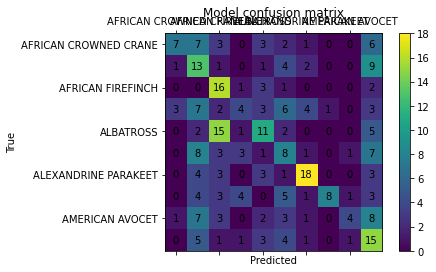

Accuracy : 34.10%


In [28]:
# USING KNN ALGORITHM

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(trainX, trainY)
pred = neigh.predict(testX)

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(10):
    for j in range(10):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))